### CNN model of Digit Recognizer using Pytorch

Hoon Kim (id : KeyboardWarrior6969)


**1. Introduction**

**2. Data Preparation**

- 2.1 Load Data
- 2.2 Check for Null and missing Values
- 2.3 Plot Sample Images
- 2.4 Data Label Distribution and Splitting
- 2.5 Training and Validation Data Split
- 2.6 Annealer
- 2.7 Plot transformed images

**3. Cnn Model**

## 1. Introduction
The aim of this notebook is to build a model, evaluate the model and save it for future use.

In [996]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image
%matplotlib inline

np.random.seed(2)
sns.set(style = 'white', context= 'notebook', palette = 'deep')

In [997]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize, Compose, ToTensor
from torch import tensor

## 2. Data Preparation

### 2.1 Load Data

In [998]:
# Load the data
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

### 2.2 Check for null and missing values

In [999]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [1000]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### 2.3 Plot Sample Images

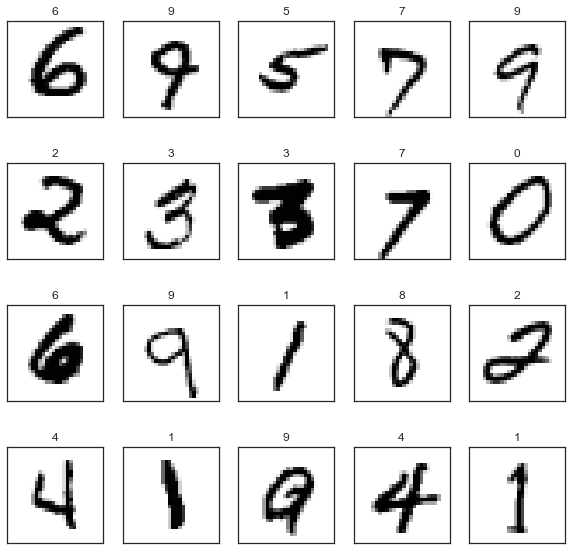

In [1001]:
sample = train.sample(n= 20)
sample_y = sample['label'].to_numpy()
sample_x = sample.drop(labels = ['label'], axis = 1) # drop labels
sample_x = sample_x.values.reshape(-1,28,28,1)

j=0
fig=plt.figure(figsize=(10, 10))
while j < 20:

    img = sample_x[j]
    fig.add_subplot(4,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(sample_y[j])
    j += 1
plt.show()

#### 2.4 Data Label Distribution and Splitting

c:\users\hoon\pycharmprojects\digitrec_real\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

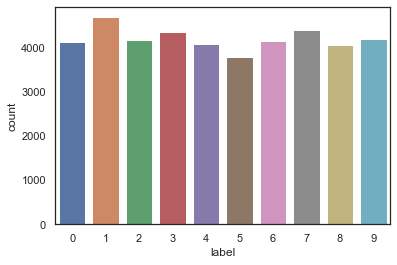

In [1002]:
Y_train = train['label'] #extract labels
X_train = train.drop(labels = ['label'], axis = 1).to_numpy() # drop labels
del train # free memory

g = sns.countplot(Y_train)
g

#### 2.5 Training and Validation Data Split


In [1003]:
train_idx, val_idx = train_test_split(list(range(len(Y_train))), test_size = 0.2)

x_val = [X_train[k] for k in val_idx]
y_val = [Y_train[k] for k in val_idx]

x_train = [X_train[k] for k in train_idx]
y_train = [Y_train[k] for k in train_idx]

#### 2.6 Annealer


In [1004]:
class dataset(Dataset):

        def __init__(self, imgs, labels,transforms):
            self.imgs = imgs
            self.labels = labels
            self.transforms = transforms

        def __len__(self): # Unncessary Method
            self.imgs_length = len(self.imgs)
            return self.imgs_length

        def __getitem__(self,idx):
            im = self.imgs[idx].reshape((28,28))
            x = Image.fromarray(im.astype(np.uint8))
            if self.transforms:
                x = self.transforms(x)
            label = self.labels[idx]
            return x, label

In [1005]:
def transformz(x):
    img_transformz = Compose([
        RandomRotation((-25,25),expand = True),
        ToTensor()
    ])
    return img_transformz(x)



In [1006]:
train_data = dataset(x_train, y_train,transformz)
val_data  = dataset(x_val, y_val,transformz)

#### 2.7 Plot transformed images

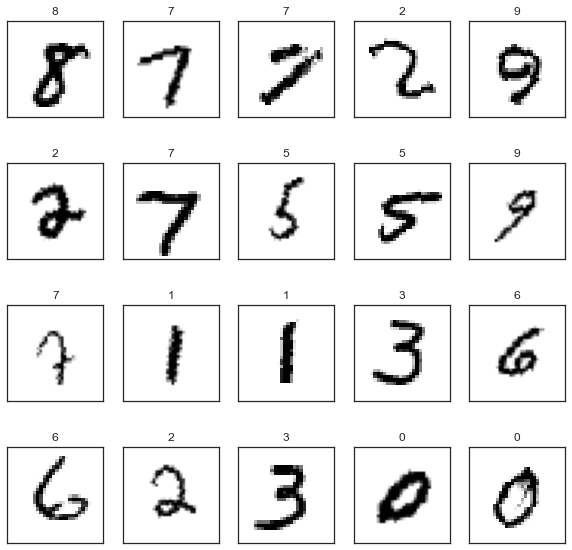

In [1009]:
import random
#Generate 5 random numbers between 10 and 30
randomlist = random.sample(range(0, len(y_train)), 20)

# Check the Images have been rotated to some degree
fig=plt.figure(figsize=(10, 10))
k = 0
for j in randomlist:

    fig.add_subplot(4,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_data[j][0]), cmap=plt.cm.binary)
    plt.title(train_data[j][1])
    k += 1
plt.show()

In [1008]:
train_loader = DataLoader(dataset = train_data, batch_size=16, shuffle=True )
val_loader = DataLoader(dataset = val_data, batch_size=16, shuffle=True )